In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/saptarshipal/DATA/used_car_price_prediction/data/vehicles.csv')
df1 = df.copy()
print(df1.shape)
print(df1.columns)


(426880, 26)
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [3]:
df1.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df1.drop(columns = ['id','url','region_url','VIN','image_url','description','state', 'lat', 'long','posting_date'],axis = 1,inplace =True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  county        0 non-null       float64
dtypes: float64(3), int64(1), object(12)
memory usage: 52.1+ MB


In [6]:
df1.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
county          426880
dtype: int64

In [7]:
# calculating percentage null values in each column
df1.isna().mean()

region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
county          1.000000
dtype: float64

In [8]:
# dropping columns which have more than 40% null values

null_columns = df1.columns[df1.isnull().mean()>0.4]
df1.drop(columns = null_columns,axis =1,inplace=True)

In [9]:
cat_cols = df1.columns[df1.dtypes == 'object']
num_cols = df1.columns[df1.dtypes != 'object']
print(f'The categorical columns are {cat_cols}.\n\n')
print(f'The numerical columns are {num_cols}.\n\n')

The categorical columns are Index(['region', 'manufacturer', 'model', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color'],
      dtype='object').


The numerical columns are Index(['price', 'year', 'odometer'], dtype='object').




In [10]:
df1[cat_cols].isna().sum()

region               0
manufacturer     17646
model             5277
fuel              3013
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
dtype: int64

In [11]:
df1[cat_cols].columns[df1[cat_cols].isna().sum().sort_values(ascending=False)>10000]

Index(['region', 'manufacturer', 'model', 'fuel'], dtype='object')

In [12]:
df1.drop(columns = ['region', 'manufacturer', 'model', 'fuel'],axis =1, inplace=True)

In [13]:
df1[num_cols].isnull().sum().sort_values(ascending=False)

odometer    4400
year        1205
price          0
dtype: int64

# Imputation

In [14]:
df1.isnull().sum()

price                0
year              1205
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
dtype: int64

In [15]:
df1.title_status.value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [16]:
columns1 = ['year','title_status','transmission','drive','type','paint_color']

for col in columns1:
    
    print(df1[col].mode())



0    2017.0
Name: year, dtype: float64
0    clean
Name: title_status, dtype: object
0    automatic
Name: transmission, dtype: object
0    4wd
Name: drive, dtype: object
0    sedan
Name: type, dtype: object
0    white
Name: paint_color, dtype: object


In [17]:
df1['odometer'].mean()

98043.33144290854

In [18]:

df1['odometer'] = df1['odometer'].fillna(98043.33144290854)
df1['year'] = df1['year'].fillna(2017)
df1['title_status'] = df1['title_status'].fillna('clean')
df1['transmission'] = df1['transmission'].fillna('automatic')
df1['drive'] = df1['transmission'].fillna('4wd')
df1['type'] = df1['transmission'].fillna('sedan')
df1['paint_color'] = df1['transmission'].fillna('white')


In [19]:
df1.isnull().sum()

price           0
year            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

# EDA

In [20]:
df1.dtypes

price             int64
year            float64
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
dtype: object

In [21]:
# changing the data type of the year column.

df1['year'] = df1['year'].astype(int)

In [22]:
df1.dtypes

price             int64
year              int64
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
dtype: object

In [23]:
# dropping rows with price 0 to 100 as they are very low prices and seem incorrect.

df1.drop(df1[(df1['price']>=0)&(df1['price']<=100)].index,axis =0,inplace=True)

In [24]:
df1.describe()


,price,year,odometer
count,3.904910e+05,390491.000000,3.904910e+05
mean,8.220635e+04,2011.034341,9.850152e+04
std,1.273724e+07,9.566913,1.985819e+05
min,1.010000e+02,1900.000000,0.000000e+00
25%,7.495000e+03,2008.000000,3.828200e+04
50%,1.550000e+04,2013.000000,8.785100e+04
75%,2.791750e+04,2017.000000,1.351760e+05
max,3.736929e+09,2022.000000,1.000000e+07


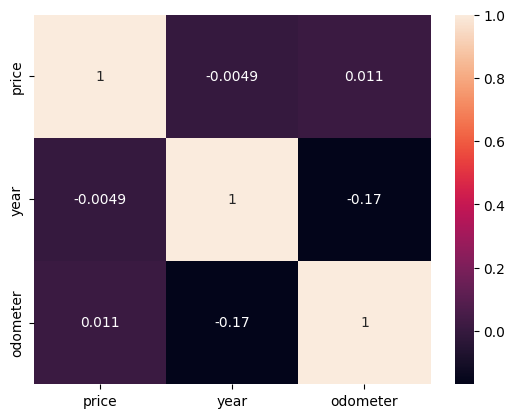

In [25]:
sns.heatmap(df1[['price','year','odometer']].corr(),annot =True)
plt.show()

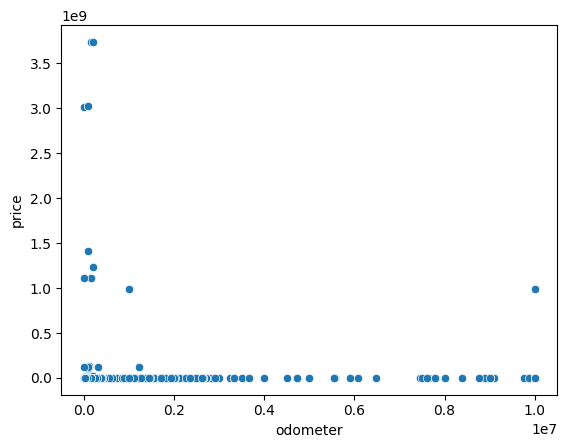

In [26]:
sns.scatterplot(data=df1,x = 'odometer',y='price')
plt.show()

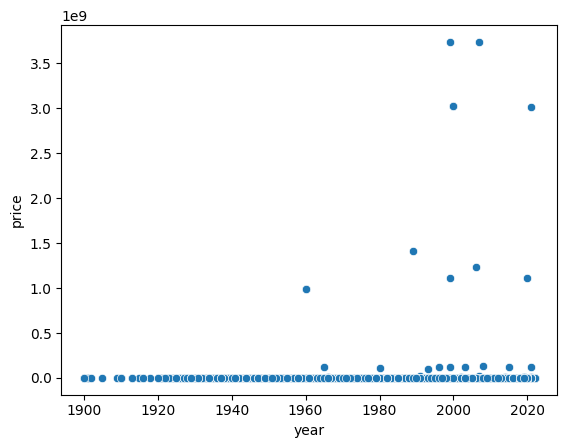

In [27]:
sns.scatterplot(data=df1,x = 'year',y='price')
plt.show()

In [28]:
# no significant pattern is visible

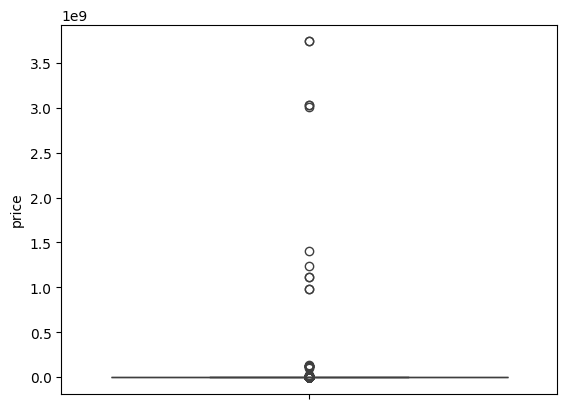

In [29]:
sns.boxplot(df1['price'])
plt.show()

In [30]:
df1['price'].sort_values(ascending=False).head(100)

356716    3736928711
318592    3736928711
91576     3024942282
257840    3024942282
37410     3009548743
             ...    
28459         249999
379442        244999
383175        244999
14950         239995
16684         239995
Name: price, Length: 100, dtype: int64

In [31]:
df1[df1['price'] >= 249999].sort_values(by='price',ascending=False)

,price,year,odometer,title_status,transmission,drive,type,paint_color
318592,3736928711,2007,164000.0,clean,automatic,automatic,automatic,automatic
356716,3736928711,1999,211000.0,clean,automatic,automatic,automatic,automatic
91576,3024942282,2000,100000.0,clean,automatic,automatic,automatic,automatic
257840,3024942282,2000,100000.0,clean,automatic,automatic,automatic,automatic
37410,3009548743,2021,1000.0,clean,automatic,automatic,automatic,automatic
...,...,...,...,...,...,...,...,...
274019,261895,2017,5600.0,clean,automatic,automatic,automatic,automatic
146709,260995,2019,11491.0,clean,automatic,automatic,automatic,automatic
56981,257995,2019,6339.0,clean,automatic,automatic,automatic,automatic
33026,255000,2018,2000.0,clean,automatic,automatic,automatic,automatic


In [32]:
# removing outliers

df1.drop(df1[df1['price'] >= 249999].index,axis =0,inplace =True)

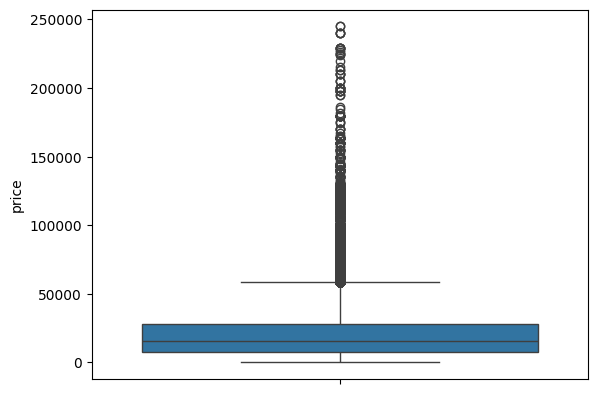

In [33]:
sns.boxplot(df1['price'])
plt.show()

In [34]:
df1.describe()

,price,year,odometer
count,390395.000000,390395.000000,3.903950e+05
mean,19049.696361,2011.036768,9.846874e+04
std,15153.572336,9.559160,1.979418e+05
min,101.000000,1900.000000,0.000000e+00
25%,7495.000000,2008.000000,3.828500e+04
50%,15500.000000,2013.000000,8.784900e+04
75%,27900.000000,2017.000000,1.351760e+05
max,244999.000000,2022.000000,1.000000e+07


# Encoding

In [35]:
df1.nunique()

price           15514
year              112
odometer        98513
title_status        6
transmission        3
drive               3
type                3
paint_color         3
dtype: int64

In [36]:
df1.columns

Index(['price', 'year', 'odometer', 'title_status', 'transmission', 'drive',
       'type', 'paint_color'],
      dtype='object')

In [37]:
df1 = pd.get_dummies(data=df1,columns=['title_status', 'transmission', 'drive','type', 'paint_color'],dtype=int)
df1.head()

,price,year,odometer,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,...,transmission_other,drive_automatic,drive_manual,drive_other,type_automatic,type_manual,type_other,paint_color_automatic,paint_color_manual,paint_color_other
0,6000,2017,98043.331443,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,11900,2017,98043.331443,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,21000,2017,98043.331443,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,1500,2017,98043.331443,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,4900,2017,98043.331443,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


# Splitting the dataset

In [38]:
y = df1['price']
X = df1.drop(columns = ['price'],axis =1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=345)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(312316, 20) (78079, 20) (312316,) (78079,)


# Modelling

In [39]:
def model_evaluator(X_train,X_test,y_train,y_test):
    
    models = {'lr':LinearRegression()
            ,'ridge':Ridge()
            ,'lasso':Lasso()
            #,'ElasticNet':ElasticNet()
            #,'SGDRegressor':SGDRegressor()
            #,'BayesianRidge':BayesianRidge()
            ,'DecisionTreeRegressor':DecisionTreeRegressor()
            ,'RandomForestRegressor':RandomForestRegressor()
            ,'ExtraTreesRegressor':ExtraTreesRegressor()
            #,'KNeighborsRegressor':KNeighborsRegressor()
            ,'SVR':SVR()
            ,'GaussianProcessRegressor':GaussianProcessRegressor()
            }
    
    result = []
    
    for name,model in models.items():
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        error = root_mean_squared_error(y_test,y_pred)
        result.append({'name':name,'model':model,'error':error})
        
    df_result = pd.DataFrame(result).sort_values(by=['error'],ascending=True, ignore_index= True)
    return df_result
    
df_evaluate = model_evaluator(X_train,X_test,y_train,y_test)
print(df_evaluate)
        
    

In [ ]:
print("The best model is "+str(df_evaluate.iloc[0,0])+ " with the rmse of "+str(df_evaluate.iloc[0,2]))